COVID 19 ITALY DATA

https://github.com/pcm-dpc/COVID-19

https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv

https://www.kaggle.com/vanshjatana/analysis-and-prediction-on-coronavirus-italy/data


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
url = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv'
df = pd.read_csv(url, error_bad_lines=False)

In [3]:
df.head()
df.tail()

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
15,2020-03-10 18:00:00,ITA,5038,877,5915,2599,8514,529,1004,631,10149,60761
16,2020-03-11 17:00:00,ITA,5838,1028,6866,3724,10590,2076,1045,827,12462,73154
17,2020-03-12 17:00:00,ITA,6650,1153,7803,5036,12839,2249,1258,1016,15113,86011
18,2020-03-13 17:00:00,ITA,7426,1328,8754,6201,14955,2116,1439,1266,17660,97488
19,2020-03-14 17:00:00,ITA,8372,1518,9890,7860,17750,2795,1966,1441,21157,109170


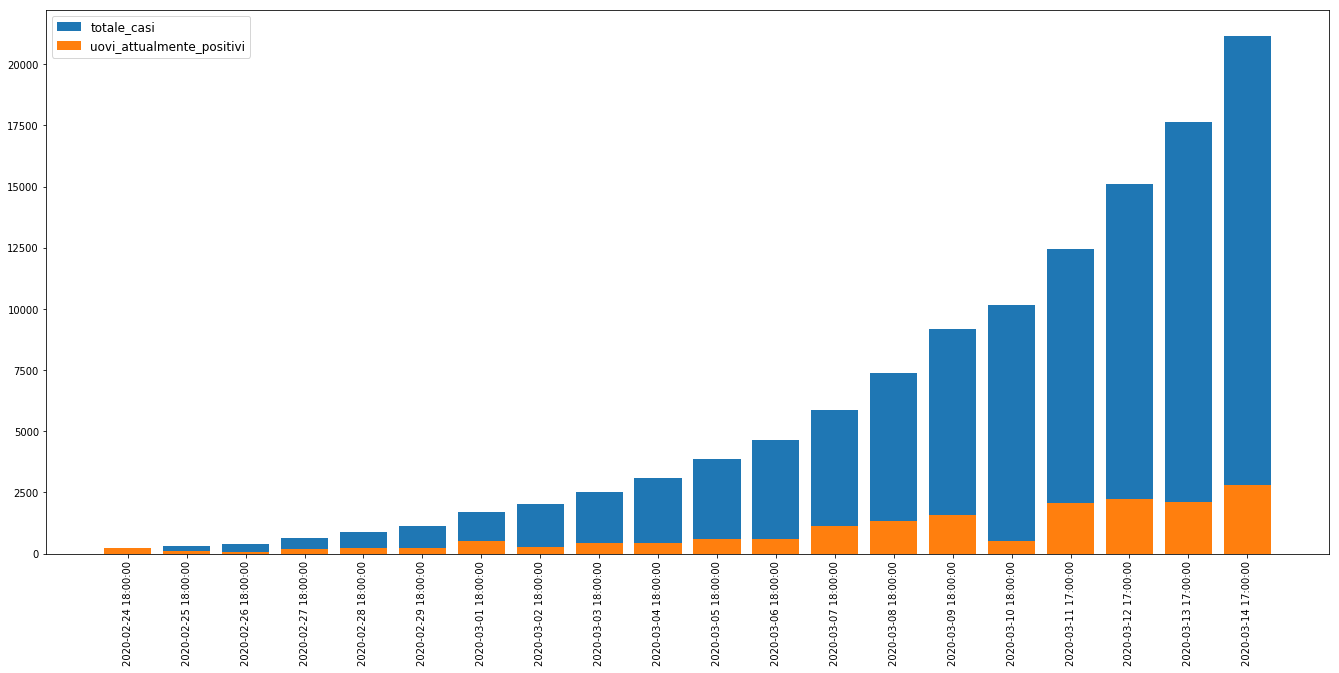

In [4]:
plt.figure(figsize=(23,10))
plt.bar(df.data, df.totale_casi, label="totale_casi")
plt.bar(df.data, df.nuovi_attualmente_positivi, label="uovi_attualmente_positivi")
plt.legend(frameon=True, fontsize=12)
plt.xticks(rotation=90)
plt.show()

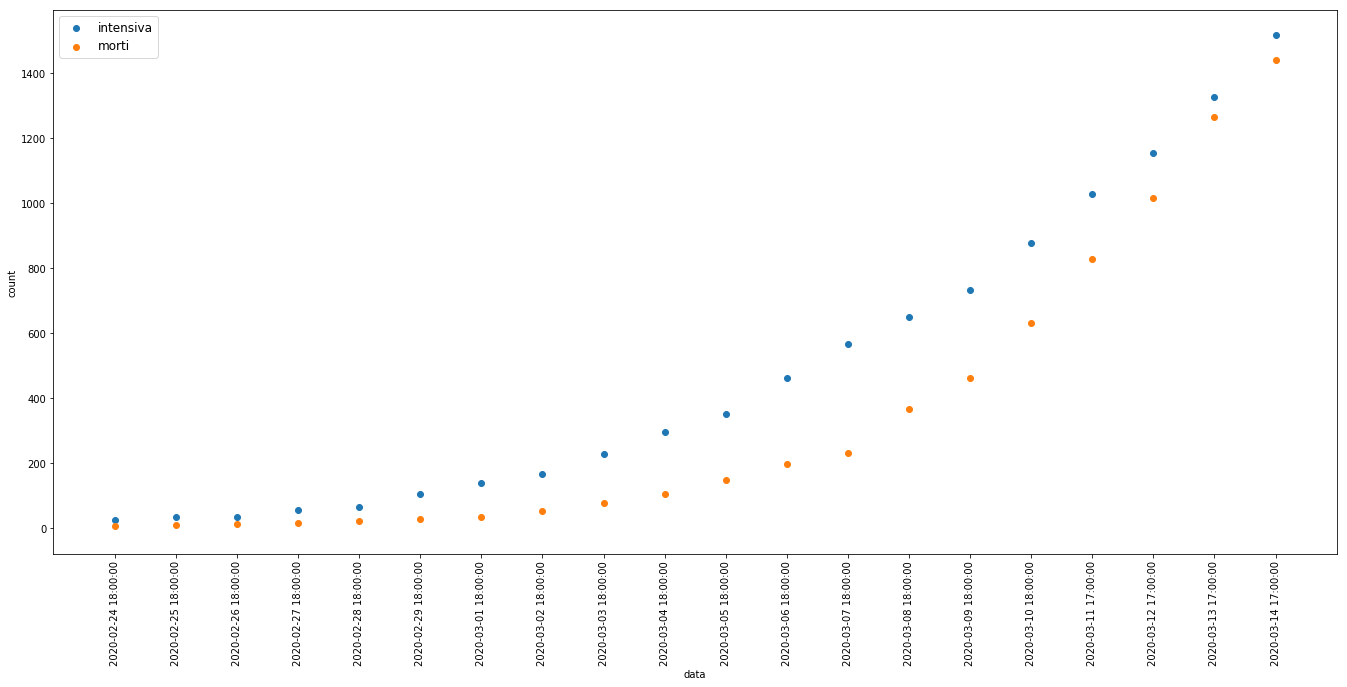

In [5]:
plt.figure(figsize=(23,10))
plt.scatter(df.data, df.terapia_intensiva, label="intensiva")
plt.scatter(df.data, df.deceduti, label="morti")
plt.xlabel('data')
plt.ylabel("count")
plt.legend(frameon=True, fontsize=12)
plt.xticks(rotation=90)
plt.show()

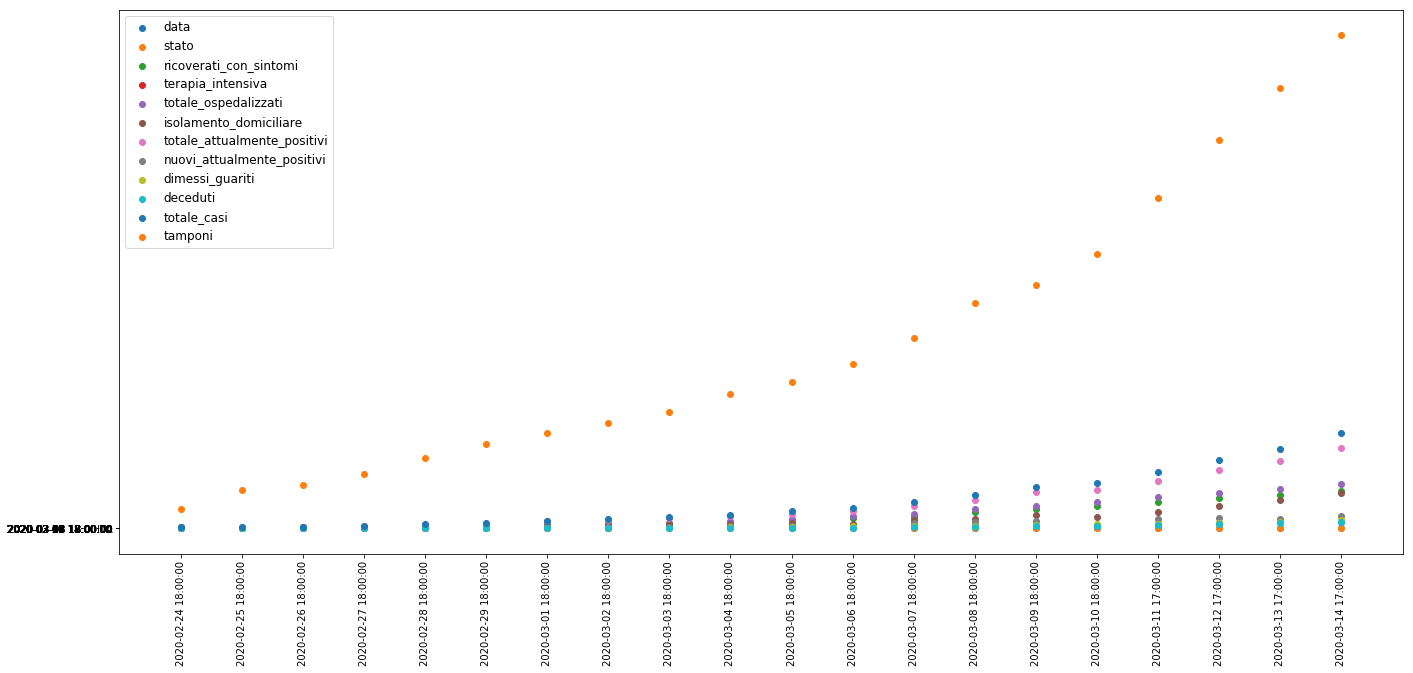

In [6]:
plt.figure(figsize=(23,10))
for col in df.columns:
    plt.scatter(df.data, df[col], label=col)
    
plt.legend(frameon=True, fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [7]:
df['ratio'] = df['deceduti']/df['totale_casi']*100

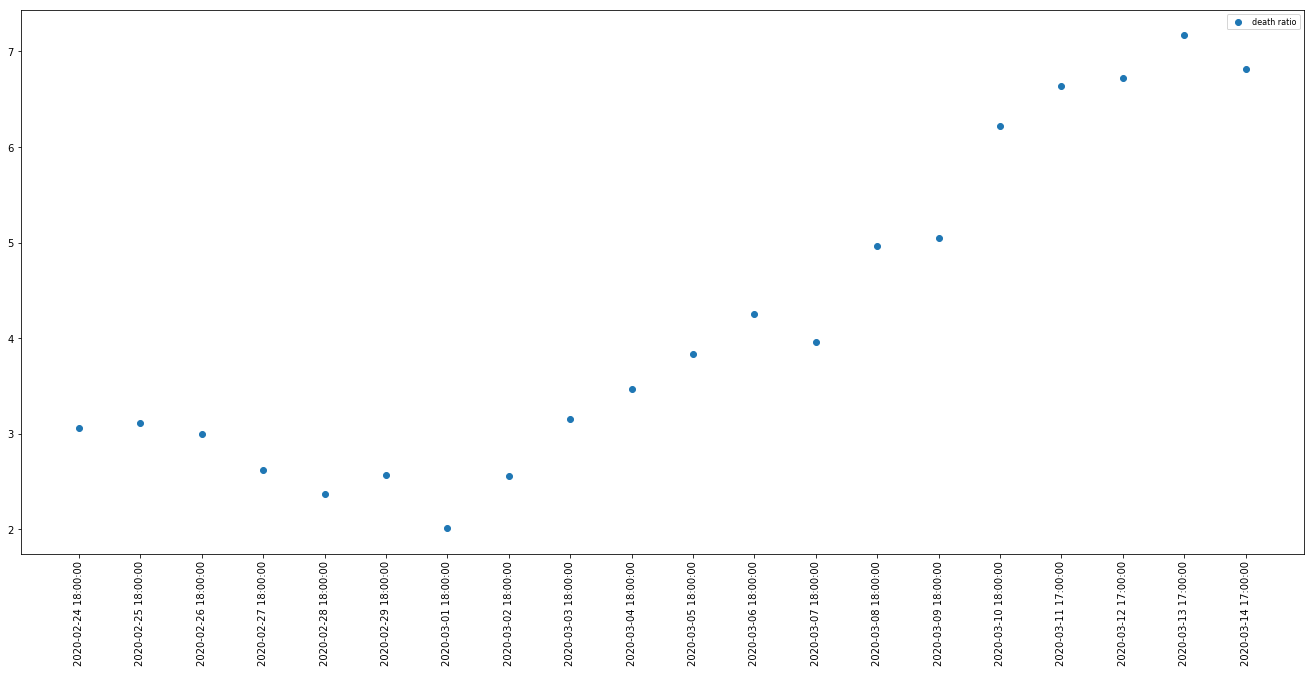

In [8]:
plt.figure(figsize=(23,10))
plt.scatter(df.data, df['ratio'], label="death ratio")
plt.legend(frameon=True, fontsize=8)
plt.xticks(rotation=90)
plt.show()

In [69]:
def func(x, a, b, c):
    return a * np.exp(b * x) + c
# fit value on 15/03  [ 20.1695243    0.21768518 -47.94728796]

In [61]:
from scipy.optimize import curve_fit

In [65]:
xdata = np.linspace(1,  df.shape[0], df.shape[0])
popt, pcov = curve_fit(func, xdata, df.deceduti)
print(popt)

[ 20.1695243    0.21768518 -47.94728796]


In [66]:
print(xdata)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20.]


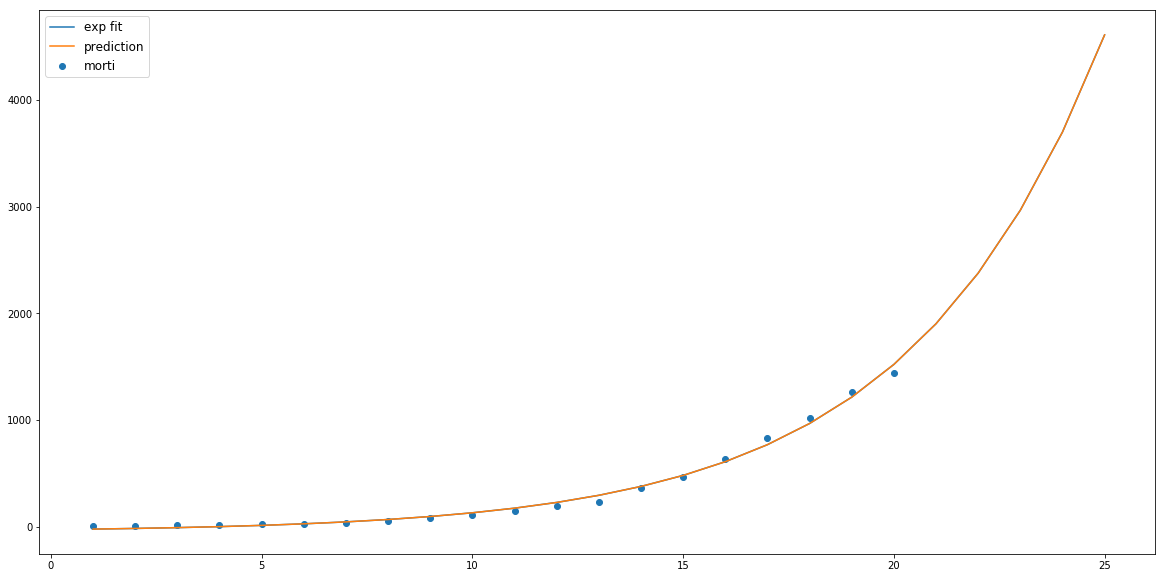

In [75]:
dim = df.shape[0]+5
xdata2 = np.linspace(1,  dim, dim)
plt.figure(figsize=(20,10))
plt.plot(xdata2, func(xdata2, *popt), label = "exp fit")
plt.plot(xdata2, func(xdata2, 20.1695243  ,  0.21768518 ,-47.94728796), label="prediction")
plt.scatter(xdata, df.deceduti, label="morti")
plt.legend(frameon=True, fontsize=12)